## Name: Shivli Mathur
## Reg. no.: 220968298
## Section: DSE-B

## Week1: Fifa_19 Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\Shivli Mathur\\Desktop\\Sem5\\DL Lab\\week2\\fifa_19.csv", encoding='latin1')

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


## Preprocessing

In [2]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0           0
ID                   0
Name                 0
Age                  1
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64


In [3]:
#Handling missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]  # Get the most frequent value in the column
        data[col].fillna(mode_value, inplace=True)
print(data.isnull().sum())

C:\Users\Shivli Mathur\AppData\Local\Temp\ipykernel_16788\2828222586.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64


In [4]:
# Define position categories
goalkeeper = ["GK"]
forward = ["ST", "LW", "RW", "LF", "RF", "RS", "LS", "CF"]
midfielder = ["CM", "RCM", "LCM", "CDM", "RDM", "LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

# Function to encode positions
def encode_position(pos):
    if pos in goalkeeper:
        return 0
    elif pos in forward:
        return 1
    elif pos in midfielder:
        return 2
    elif pos in defender:
        return 3
    else:
        return -1

# Apply encoding
data['Position'] = data['Position'].apply(encode_position)


In [5]:
from sklearn.model_selection import train_test_split
features = ['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 
            'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
            'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 
            'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
            'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 
            'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
# Features and target variable
X = data[features]
y = data['Position']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Experimenting with number of layers

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Function to create a neural network model
def create_model(input_dim, layers, neurons):
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=input_dim, activation='relu'))
    
    for i in range(1, layers):
        model.add(Dense(neurons[i], activation='relu'))
        
    model.add(Dense(4, activation='softmax')) # 4 output classes (GK, Forward, Midfielder, Defender)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List to store models and their details
models = []


In [7]:
import matplotlib.pyplot as plt

# Function to train the model and plot training history
def train_and_plot(model, X_train, y_train, X_val, y_val, epochs):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32)
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    return history

Epoch 1/50


C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6674 - loss: 3.3550 - val_accuracy: 0.8182 - val_loss: 0.5849
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8071 - loss: 0.6166 - val_accuracy: 0.7864 - val_loss: 0.6272
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8250 - loss: 0.5107 - val_accuracy: 0.8660 - val_loss: 0.3748
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8338 - loss: 0.4430 - val_accuracy: 0.7809 - val_loss: 0.5721
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8309 - loss: 0.4407 - val_accuracy: 0.8484 - val_loss: 0.3508
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8364 - loss: 0.3979 - val_accuracy: 0.8094 - val_loss: 0.4710
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.3929 - val_accuracy: 0.8567 - val_loss: 0.3918
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8493 - loss: 0.3672 - val_accuracy: 0.8473 - val_

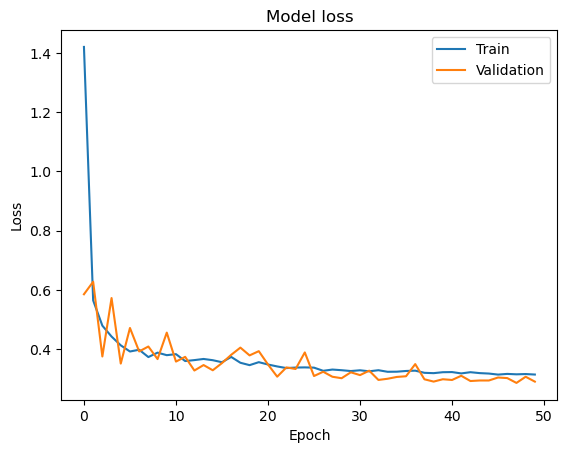

In [8]:
# Experiment with 1 hidden layer
model_1 = create_model(input_dim=X_train.shape[1], layers=1, neurons=[64])
history_1 = train_and_plot(model_1, X_train, y_train, X_val, y_val, epochs=50)
models.append((model_1, history_1))

Epoch 1/50


C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6964 - loss: 5.2172 - val_accuracy: 0.8495 - val_loss: 0.4122
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8262 - loss: 0.5013 - val_accuracy: 0.8369 - val_loss: 0.3946
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8301 - loss: 0.4859 - val_accuracy: 0.8567 - val_loss: 0.3794
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.4338 - val_accuracy: 0.8726 - val_loss: 0.3155
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8435 - loss: 0.3792 - val_accuracy: 0.8506 - val_loss: 0.3888
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4016 - val_accuracy: 0.8177 - val_loss: 0.4130
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8438 - loss: 0.3817 - val_accuracy: 0.7847 - val_loss: 0.5106
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8498 - loss: 0.3781 - val_accuracy: 0.8

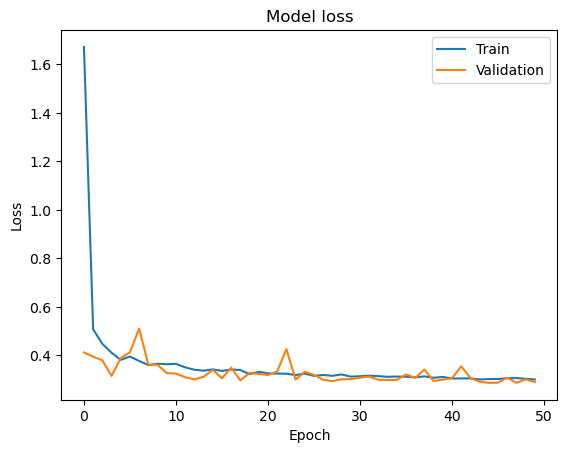

In [9]:
#Experiment with 2 layers
model_2 = create_model(input_dim=X_train.shape[1], layers=2, neurons=[64, 32])
history_2 = train_and_plot(model_2, X_train, y_train, X_val, y_val, epochs=50)
models.append((model_2, history_2))

Epoch 1/50


C:\Users\Shivli Mathur\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6144 - loss: 2.1970 - val_accuracy: 0.7732 - val_loss: 0.6051
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8178 - loss: 0.4447 - val_accuracy: 0.8583 - val_loss: 0.3531
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8393 - loss: 0.3901 - val_accuracy: 0.8644 - val_loss: 0.3337
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8409 - loss: 0.3823 - val_accuracy: 0.8726 - val_loss: 0.3190
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8455 - loss: 0.3716 - val_accuracy: 0.8693 - val_loss: 0.3270
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8505 - loss: 0.3605 - val_accuracy: 0.8616 - val_loss: 0.3399
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.3462 - val_accuracy: 0.8638 - val_loss: 0.3515
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8575 - loss: 0.3507 - val_accuracy: 0.8501 - val_

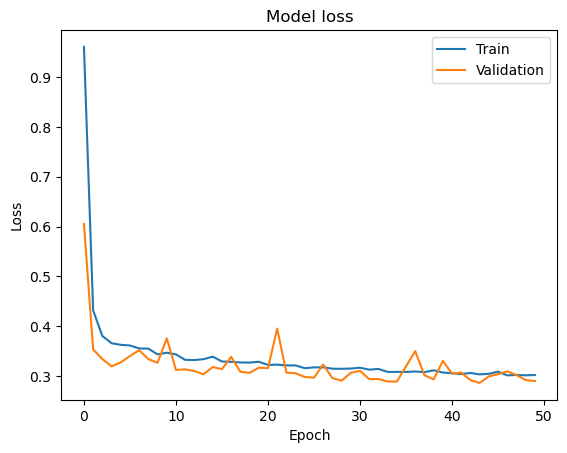

In [10]:
#Experiment with 3 hidden layer
model_3 = create_model(input_dim=X_train.shape[1], layers=3, neurons=[64, 32, 16])
history_3 = train_and_plot(model_3, X_train, y_train, X_val, y_val, epochs=50)
models.append((model_3, history_3))

## Checking model 1 for diffrent epochs

Training for 10 epochs...
Epoch 1/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8664 - loss: 0.3176 - val_accuracy: 0.8594 - val_loss: 0.3243
Epoch 2/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8658 - loss: 0.3145 - val_accuracy: 0.8627 - val_loss: 0.3145
Epoch 3/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8753 - loss: 0.3005 - val_accuracy: 0.8682 - val_loss: 0.2998
Epoch 4/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8717 - loss: 0.3066 - val_accuracy: 0.8737 - val_loss: 0.2929
Epoch 5/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8772 - loss: 0.3046 - val_accuracy: 0.8589 - val_loss: 0.3221
Epoch 6/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8697 - loss: 0.3107 - val_accuracy: 0.8616 - val_loss: 0.3065
Epoch 7/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8743 - loss: 0.3093 - val_accuracy: 0.8699 - val_loss: 0.3063
Epoch 8/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8710 - loss:

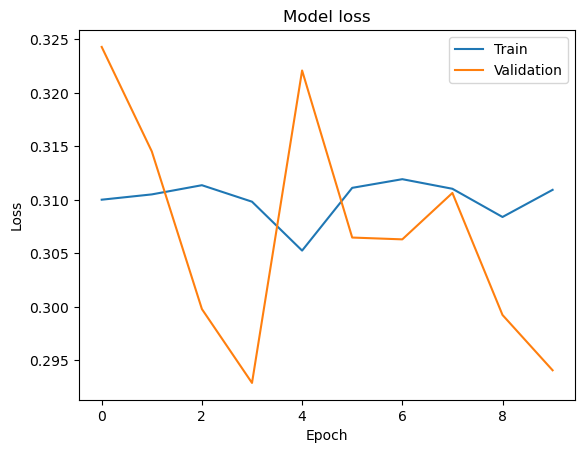

Training for 20 epochs...
Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8752 - loss: 0.3013 - val_accuracy: 0.8781 - val_loss: 0.2865
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8714 - loss: 0.3072 - val_accuracy: 0.8660 - val_loss: 0.3094
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8790 - loss: 0.3008 - val_accuracy: 0.8660 - val_loss: 0.3161
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8737 - loss: 0.3011 - val_accuracy: 0.8671 - val_loss: 0.2981
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8697 - loss: 0.3053 - val_accuracy: 0.8781 - val_loss: 0.2891
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8680 - loss: 0.3139 - val_accuracy: 0.8803 - val_loss: 0.2837
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8722 - loss: 0.3062 - val_accuracy: 0.8638 - val_loss: 0.3230
Epoch 8/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss:

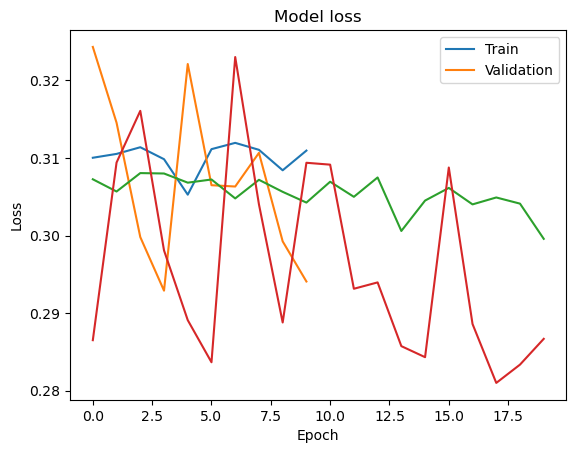

Training for 30 epochs...
Epoch 1/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8706 - loss: 0.3071 - val_accuracy: 0.8633 - val_loss: 0.3108
Epoch 2/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8739 - loss: 0.3073 - val_accuracy: 0.8671 - val_loss: 0.3087
Epoch 3/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8775 - loss: 0.2920 - val_accuracy: 0.8792 - val_loss: 0.2897
Epoch 4/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8775 - loss: 0.3002 - val_accuracy: 0.8830 - val_loss: 0.2879
Epoch 5/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8757 - loss: 0.2992 - val_accuracy: 0.8539 - val_loss: 0.3061
Epoch 6/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.3122 - val_accuracy: 0.8858 - val_loss: 0.2935
Epoch 7/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8743 - loss: 0.3068 - val_accuracy: 0.8753 - val_loss: 0.2929
Epoch 8/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8789 - loss:

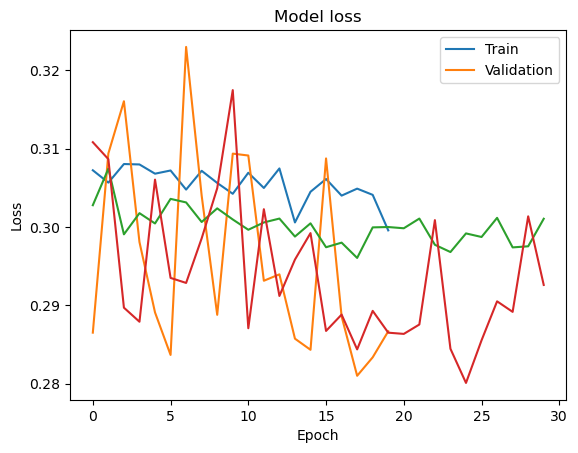

Training for 40 epochs...
Epoch 1/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8782 - loss: 0.2966 - val_accuracy: 0.8841 - val_loss: 0.2864
Epoch 2/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8805 - loss: 0.2930 - val_accuracy: 0.8710 - val_loss: 0.3446
Epoch 3/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8766 - loss: 0.2987 - val_accuracy: 0.8814 - val_loss: 0.2863
Epoch 4/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8808 - loss: 0.2930 - val_accuracy: 0.8770 - val_loss: 0.2812
Epoch 5/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8782 - loss: 0.2916 - val_accuracy: 0.8819 - val_loss: 0.2918
Epoch 6/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8769 - loss: 0.2956 - val_accuracy: 0.8781 - val_loss: 0.2874
Epoch 7/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8787 - loss: 0.2977 - val_accuracy: 0.8781 - val_loss: 0.2911
Epoch 8/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8752 - loss:

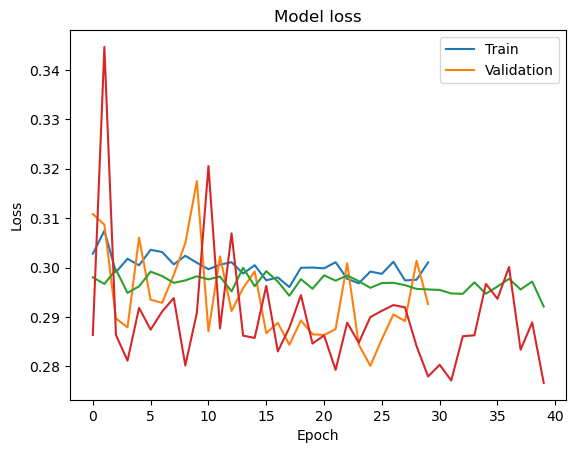

Training for 50 epochs...
Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8762 - loss: 0.2966 - val_accuracy: 0.8797 - val_loss: 0.2848
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8756 - loss: 0.3006 - val_accuracy: 0.8781 - val_loss: 0.2974
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8743 - loss: 0.3050 - val_accuracy: 0.8781 - val_loss: 0.2797
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8799 - loss: 0.2939 - val_accuracy: 0.8803 - val_loss: 0.2795
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8780 - loss: 0.2937 - val_accuracy: 0.8710 - val_loss: 0.2938
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.3002 - val_accuracy: 0.8841 - val_loss: 0.2812
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8800 - loss: 0.2915 - val_accuracy: 0.8797 - val_loss: 0.2826
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss:

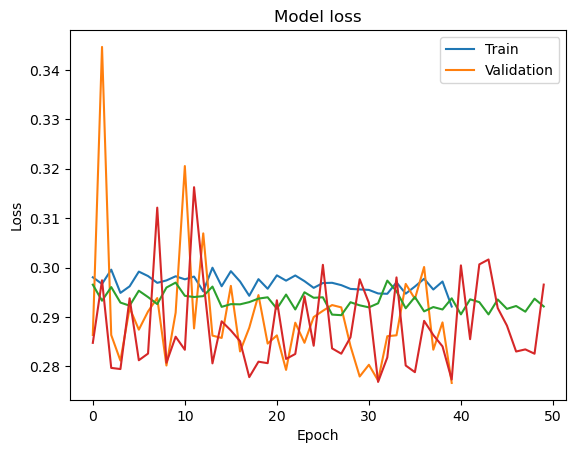

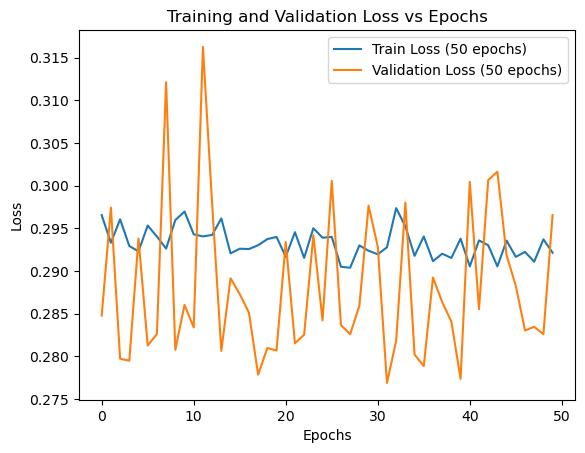

In [11]:
import matplotlib.pyplot as plt

# Function to train the model and plot loss curves for a range of epochs
def train_and_plot_epochs(model_1, X_train, y_train, X_val, y_val, epochs_range):
    history_dict = {}  # To store the history of each epoch count
    
    for epochs in epochs_range:
        print(f"Training for {epochs} epochs...")
        history= train_and_plot(model_1, X_train, y_train, X_val, y_val, epochs=epochs)
        
        # Store the history
        history_dict[epochs] = history.history
        
        # Plot training and validation loss
        plt.plot(history.history['loss'], label=f'Train Loss ({epochs} epochs)')
        plt.plot(history.history['val_loss'], label=f'Validation Loss ({epochs} epochs)')
    
    plt.title('Training and Validation Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return history_dict

# Define the range of epochs to test
epochs_range = [10, 20, 30, 40, 50]

# Example for the first model
history_dict_1 = train_and_plot_epochs(model_1, X_train, y_train, X_val, y_val, epochs_range)


## Checking model 2 for diffrent epochs

Training for 10 epochs...
Epoch 1/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8766 - loss: 0.2949 - val_accuracy: 0.8775 - val_loss: 0.2824
Epoch 2/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.2870 - val_accuracy: 0.8830 - val_loss: 0.2820
Epoch 3/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8806 - loss: 0.2888 - val_accuracy: 0.8792 - val_loss: 0.2842
Epoch 4/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8798 - loss: 0.2936 - val_accuracy: 0.8781 - val_loss: 0.2799
Epoch 5/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8783 - loss: 0.2937 - val_accuracy: 0.8792 - val_loss: 0.2789
Epoch 6/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.2857 - val_accuracy: 0.8753 - val_loss: 0.2915
Epoch 7/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.2936 - val_accuracy: 0.8803 - val_loss: 0.2760
Epoch 8/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8849 - loss:

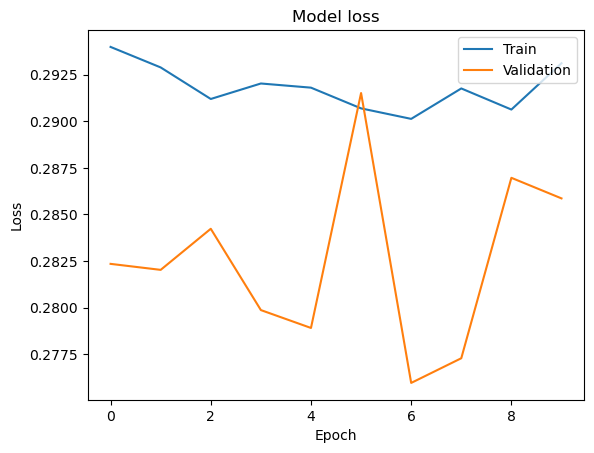

Training for 20 epochs...
Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8868 - loss: 0.2819 - val_accuracy: 0.8830 - val_loss: 0.2811
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8804 - loss: 0.2898 - val_accuracy: 0.8797 - val_loss: 0.2774
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8837 - loss: 0.2892 - val_accuracy: 0.8863 - val_loss: 0.2785
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8855 - loss: 0.2855 - val_accuracy: 0.8808 - val_loss: 0.2851
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8715 - loss: 0.2984 - val_accuracy: 0.8737 - val_loss: 0.2819
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.2974 - val_accuracy: 0.8852 - val_loss: 0.2798
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8781 - loss: 0.2900 - val_accuracy: 0.8781 - val_loss: 0.2819
Epoch 8/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8829 - loss:

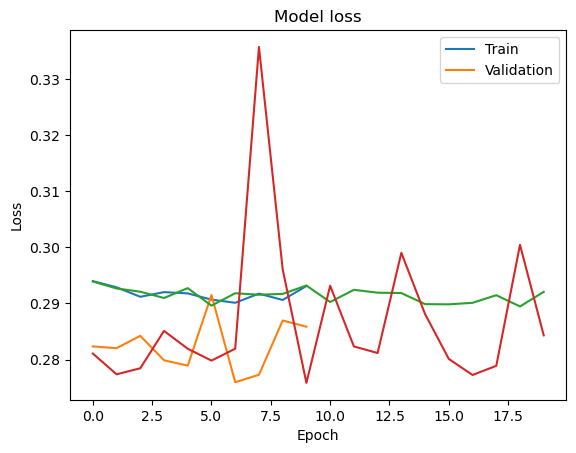

Training for 30 epochs...
Epoch 1/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.2781 - val_accuracy: 0.8797 - val_loss: 0.2796
Epoch 2/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8805 - loss: 0.2884 - val_accuracy: 0.8726 - val_loss: 0.2964
Epoch 3/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8814 - loss: 0.2833 - val_accuracy: 0.8825 - val_loss: 0.2781
Epoch 4/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.2856 - val_accuracy: 0.8770 - val_loss: 0.2932
Epoch 5/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8835 - loss: 0.2869 - val_accuracy: 0.8759 - val_loss: 0.2864
Epoch 6/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.2826 - val_accuracy: 0.8726 - val_loss: 0.2936
Epoch 7/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.2956 - val_accuracy: 0.8775 - val_loss: 0.2863
Epoch 8/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss:

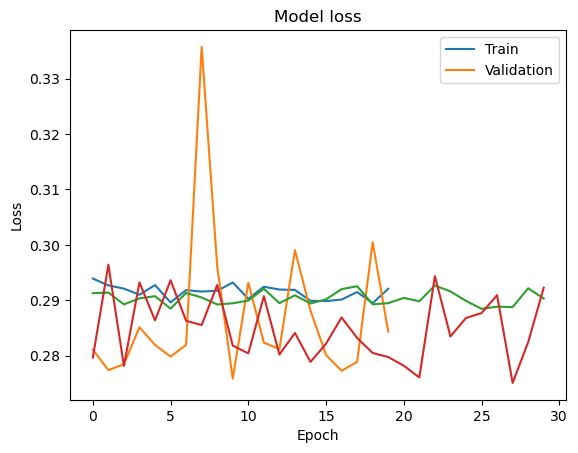

Training for 40 epochs...
Epoch 1/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8795 - loss: 0.2923 - val_accuracy: 0.8841 - val_loss: 0.2770
Epoch 2/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8841 - loss: 0.2870 - val_accuracy: 0.8764 - val_loss: 0.2797
Epoch 3/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8795 - loss: 0.2980 - val_accuracy: 0.8797 - val_loss: 0.2835
Epoch 4/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.2871 - val_accuracy: 0.8737 - val_loss: 0.2852
Epoch 5/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8847 - loss: 0.2861 - val_accuracy: 0.8770 - val_loss: 0.2841
Epoch 6/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.2818 - val_accuracy: 0.8808 - val_loss: 0.2782
Epoch 7/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.2925 - val_accuracy: 0.8803 - val_loss: 0.2791
Epoch 8/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8818 - loss:

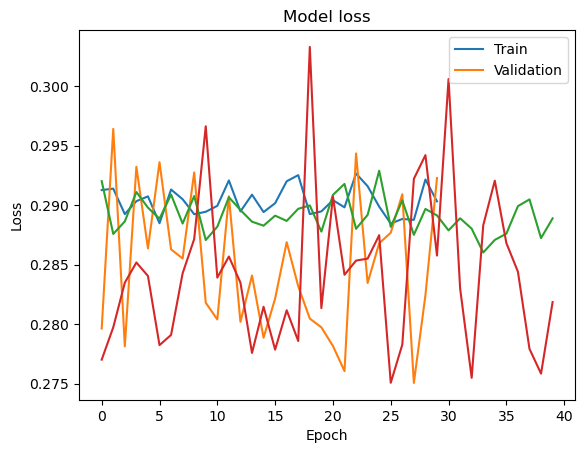

Training for 50 epochs...
Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8811 - loss: 0.2857 - val_accuracy: 0.8808 - val_loss: 0.2748
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8805 - loss: 0.2946 - val_accuracy: 0.8753 - val_loss: 0.2860
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8793 - loss: 0.2869 - val_accuracy: 0.8814 - val_loss: 0.2779
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8785 - loss: 0.2917 - val_accuracy: 0.8770 - val_loss: 0.2871
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8741 - loss: 0.2970 - val_accuracy: 0.8847 - val_loss: 0.2778
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8772 - loss: 0.2936 - val_accuracy: 0.8699 - val_loss: 0.3019
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8823 - loss: 0.2846 - val_accuracy: 0.8825 - val_loss: 0.2739
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss:

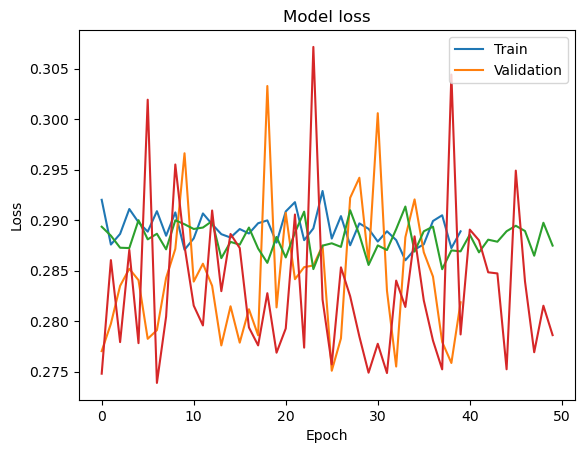

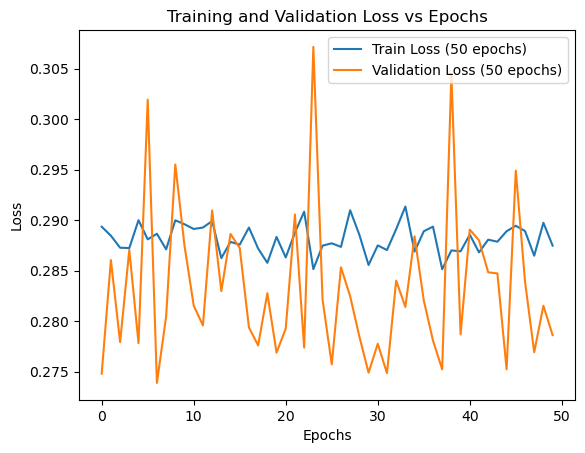

In [12]:
import matplotlib.pyplot as plt

# Function to train the model and plot loss curves for a range of epochs
def train_and_plot_epochs(model_2, X_train, y_train, X_val, y_val, epochs_range):
    history_dict = {}  # To store the history of each epoch count
    
    for epochs in epochs_range:
        print(f"Training for {epochs} epochs...")
        history= train_and_plot(model_2, X_train, y_train, X_val, y_val, epochs=epochs)
        
        # Store the history
        history_dict[epochs] = history.history
        
        # Plot training and validation loss
        plt.plot(history.history['loss'], label=f'Train Loss ({epochs} epochs)')
        plt.plot(history.history['val_loss'], label=f'Validation Loss ({epochs} epochs)')
    
    plt.title('Training and Validation Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return history_dict

# Define the range of epochs to test
epochs_range = [10, 20, 30, 40, 50]

# Example for the first model
history_dict_1 = train_and_plot_epochs(model_1, X_train, y_train, X_val, y_val, epochs_range)


## Checking model 3 for diffrent epochs

Training for 10 epochs...
Epoch 1/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.2860 - val_accuracy: 0.8781 - val_loss: 0.2776
Epoch 2/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8840 - loss: 0.2775 - val_accuracy: 0.8803 - val_loss: 0.2796
Epoch 3/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.2831 - val_accuracy: 0.8852 - val_loss: 0.2799
Epoch 4/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8783 - loss: 0.2939 - val_accuracy: 0.8803 - val_loss: 0.2799
Epoch 5/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8788 - loss: 0.2889 - val_accuracy: 0.8858 - val_loss: 0.2798
Epoch 6/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8756 - loss: 0.2980 - val_accuracy: 0.8737 - val_loss: 0.2880
Epoch 7/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8834 - loss: 0.2821 - val_accuracy: 0.8841 - val_loss: 0.2787
Epoch 8/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss:

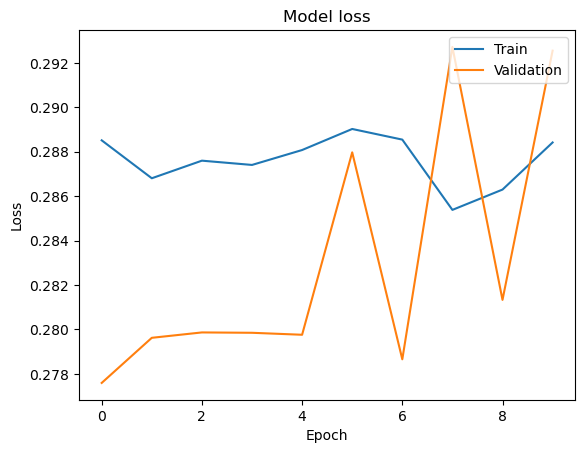

Training for 20 epochs...
Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.2910 - val_accuracy: 0.8863 - val_loss: 0.2761
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.2828 - val_accuracy: 0.8880 - val_loss: 0.2728
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss: 0.2837 - val_accuracy: 0.8803 - val_loss: 0.2871
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8828 - loss: 0.2889 - val_accuracy: 0.8786 - val_loss: 0.2772
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8769 - loss: 0.2906 - val_accuracy: 0.8808 - val_loss: 0.2777
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8814 - loss: 0.2869 - val_accuracy: 0.8775 - val_loss: 0.2801
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8813 - loss: 0.2869 - val_accuracy: 0.8858 - val_loss: 0.2764
Epoch 8/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8791 - loss:

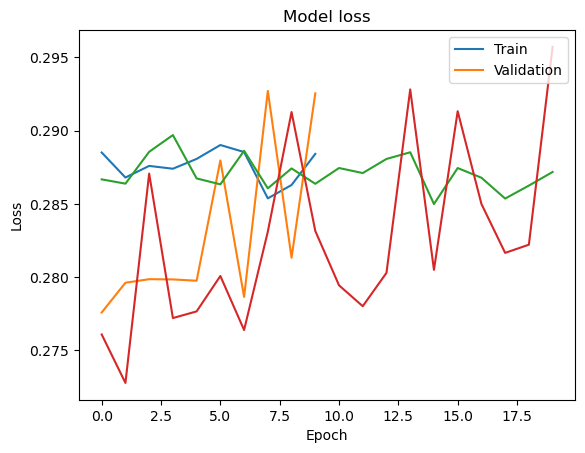

Training for 30 epochs...
Epoch 1/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.2872 - val_accuracy: 0.8797 - val_loss: 0.2877
Epoch 2/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8824 - loss: 0.2917 - val_accuracy: 0.8759 - val_loss: 0.2875
Epoch 3/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8808 - loss: 0.2865 - val_accuracy: 0.8808 - val_loss: 0.2779
Epoch 4/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8781 - loss: 0.2877 - val_accuracy: 0.8852 - val_loss: 0.2794
Epoch 5/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8759 - loss: 0.2987 - val_accuracy: 0.8808 - val_loss: 0.2771
Epoch 6/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8812 - loss: 0.2909 - val_accuracy: 0.8792 - val_loss: 0.2804
Epoch 7/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.2913 - val_accuracy: 0.8819 - val_loss: 0.2848
Epoch 8/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8801 - loss:

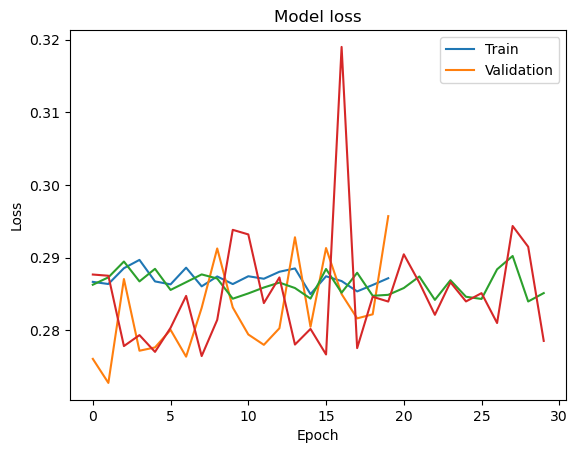

Training for 40 epochs...
Epoch 1/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.2895 - val_accuracy: 0.8847 - val_loss: 0.2831
Epoch 2/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8855 - loss: 0.2879 - val_accuracy: 0.8792 - val_loss: 0.2851
Epoch 3/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8812 - loss: 0.2838 - val_accuracy: 0.8830 - val_loss: 0.2768
Epoch 4/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.2869 - val_accuracy: 0.8792 - val_loss: 0.2768
Epoch 5/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8812 - loss: 0.2863 - val_accuracy: 0.8852 - val_loss: 0.2804
Epoch 6/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.2829 - val_accuracy: 0.8825 - val_loss: 0.2835
Epoch 7/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8884 - loss: 0.2790 - val_accuracy: 0.8753 - val_loss: 0.2879
Epoch 8/40
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8851 - loss:

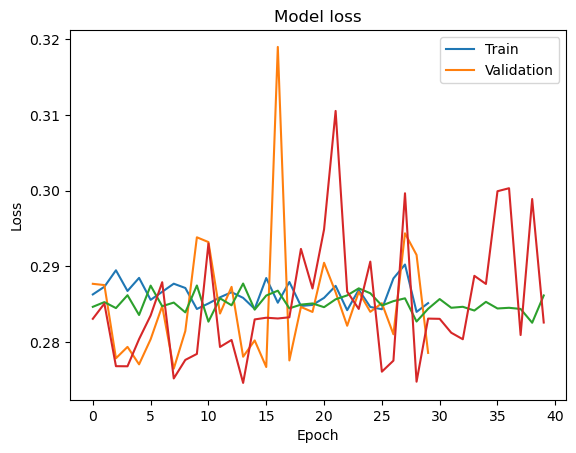

Training for 50 epochs...
Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8806 - loss: 0.2913 - val_accuracy: 0.8830 - val_loss: 0.2786
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8779 - loss: 0.2915 - val_accuracy: 0.8797 - val_loss: 0.2955
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.2817 - val_accuracy: 0.8830 - val_loss: 0.2795
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8915 - loss: 0.2765 - val_accuracy: 0.8814 - val_loss: 0.2888
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8886 - loss: 0.2798 - val_accuracy: 0.8759 - val_loss: 0.2960
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8851 - loss: 0.2814 - val_accuracy: 0.8825 - val_loss: 0.2912
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8809 - loss: 0.2876 - val_accuracy: 0.8808 - val_loss: 0.2925
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8837 - loss:

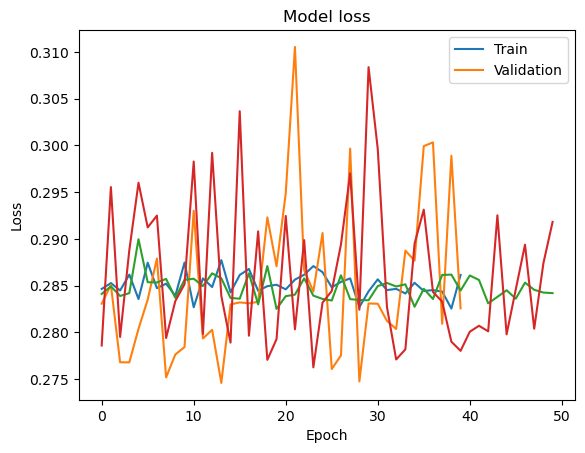

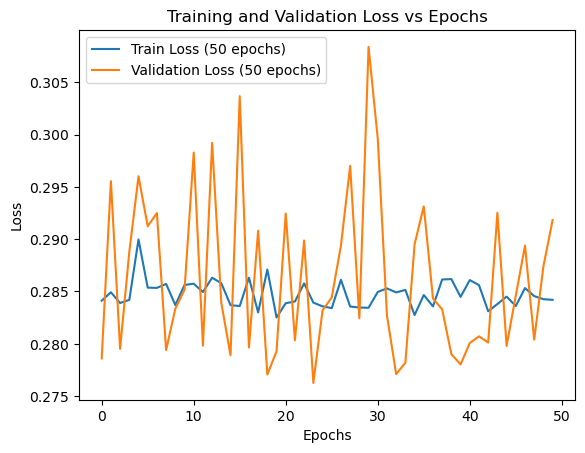

In [13]:
import matplotlib.pyplot as plt

# Function to train the model and plot loss curves for a range of epochs
def train_and_plot_epochs(model_3, X_train, y_train, X_val, y_val, epochs_range):
    history_dict = {}  # To store the history of each epoch count
    
    for epochs in epochs_range:
        print(f"Training for {epochs} epochs...")
        history= train_and_plot(model_3, X_train, y_train, X_val, y_val, epochs=epochs)
        
        # Store the history
        history_dict[epochs] = history.history
        
        # Plot training and validation loss
        plt.plot(history.history['loss'], label=f'Train Loss ({epochs} epochs)')
        plt.plot(history.history['val_loss'], label=f'Validation Loss ({epochs} epochs)')
    
    plt.title('Training and Validation Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return history_dict

# Define the range of epochs to test
epochs_range = [10, 20, 30, 40, 50]

# Example for the first model
history_dict_1 = train_and_plot_epochs(model_1, X_train, y_train, X_val, y_val, epochs_range)


## Reprting the metrics

In [14]:
from sklearn.metrics import classification_report

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    print(classification_report(y_test, y_pred_classes, target_names=['Goalkeeper', 'Forward', 'Midfielder', 'Defender']))

# Evaluate each model
for i, (model, history) in enumerate(models):
    print(f"\nModel {i+1} Evaluation:")
    evaluate_model(model, X_test, y_test)



Model 1 Evaluation:
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       226
     Forward       0.90      0.67      0.77       337
  Midfielder       0.83      0.87      0.85       719
    Defender       0.88      0.96      0.91       539

    accuracy                           0.87      1821
   macro avg       0.90      0.87      0.88      1821
weighted avg       0.88      0.87      0.87      1821


Model 2 Evaluation:
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       226
     Forward       0.82      0.72      0.77       337
  Midfielder       0.83      0.83      0.83       719
    Defender       0.87      0.94      0.91       539

    accuracy                           0.86      1821
   macro avg       0.88      0.87      0.88      1821
weighted avg       0.86      0.86      0.86      1821


Model 3 E

In [17]:
import numpy as np
#Checking accuracy for diffrent classes
y_pred = model.predict(X_test)
# If y_pred is a 2D array (probabilities), convert to class labels
if y_pred.ndim == 2:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = y_pred  # Already in class label format

# If y_test is in one-hot encoded format, convert to integer labels
if y_test.ndim == 2:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test  # Already in class label format

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3', 'Class4'])  # Replace with actual class names
print("Classification Report:\n", report)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

      Class1       1.00      1.00      1.00       226
      Class2       0.84      0.75      0.79       337
      Class3       0.85      0.82      0.83       719
      Class4       0.86      0.96      0.91       539

    accuracy                           0.87      1821
   macro avg       0.89      0.88      0.88      1821
weighted avg       0.87      0.87      0.87      1821

